In [2]:
import numpy as np
import tensorflow as tf
from tensorflow import keras

import scipy

# data viz
import matplotlib.pyplot as plt

In [3]:
# Load MNIST
data = keras.datasets.mnist.load_data(path="mnist.npz")
data

11490434/11490434 [==============================] - 0s 0us/step


((array([[[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         ...,
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0

In [4]:
(X_train, y_train), (X_ideal, y_ideal) = data
type(X_train)

numpy.ndarray

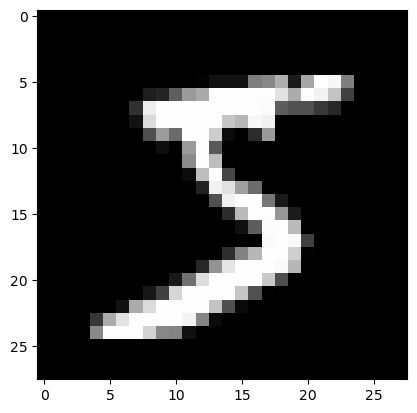

In [5]:
plt.imshow(X_train[0], cmap="gray")

In [6]:
print(X_train[0].shape)
y_train[0]

(28, 28)


5

In [7]:
print(len(y_train))
print(len(y_ideal))

60000
10000


In [8]:
# scale the images in the [0, 1] range
X_train = X_train.astype("float32") / 255.0
X_ideal = X_ideal.astype("float32") / 255.0

In [9]:
from keras.layers import Input, Conv2D, Activation, MaxPooling2D, Flatten, Dense, Reshape
from keras.models import Model, Sequential
from keras.losses import SparseCategoricalCrossentropy
from keras.optimizers import SGD


# Wanted to challenge myself, wasn't sure if it was ok, so I left it like this in a comment :)
'''
# Instantiated like so: `ConvBlock(50)` and `ConvBlock(20)`
class ConvBlock(keras.layers.Layer):
  def __init__(self, units: int):
    super().__init__()
    self.conv = Conv2D(units, kernel_size=(5, 5), padding="valid")
    self.activation_func = Activation("relu")
    self.max_pool = MaxPooling2D(pool_size=(2, 2), strides=2)

  def call(self, inputs):
    x = self.conv(inputs)
    x = self.activation_func(x)
    x_ = self.max_pool(x)

    return x_ 
'''

# Model time! (LeNet)
model = Sequential([
    Input(shape=(28, 28)),
    Reshape(target_shape=(28, 28, 1)),
    
    # Conv Block 1
    Conv2D(50, kernel_size=(5, 5), padding="valid"),
    Activation("relu"),
    MaxPooling2D(pool_size=(2, 2), strides=2),

    # Conv Block 2
    Conv2D(20, kernel_size=(5, 5), padding="valid"),
    Activation("relu"),
    MaxPooling2D(pool_size=(2, 2), strides=2),

    # Flatten
    Flatten(),

    Dense(200, activation="relu"),
    Dense(2, activation="linear"),  # "embedding" layer for visualization

    Dense(10, activation="softmax")  # not logits ;_;
])

model.compile(loss=SparseCategoricalCrossentropy(), optimizer=SGD(learning_rate=0.01))

model.fit(X_train, y_train, batch_size=100, epochs=200, validation_split=0.1)

Epoch 1/200
540/540 [==============================] - 18s 33ms/step - loss: 1.9620 - val_loss: 1.3983
Epoch 2/200
540/540 [==============================] - 18s 33ms/step - loss: 1.1646 - val_loss: 1.1083
Epoch 3/200
540/540 [==============================] - 16s 30ms/step - loss: 0.8738 - val_loss: 0.7078
Epoch 4/200
540/540 [==============================] - 18s 33ms/step - loss: 0.7047 - val_loss: 0.5820
Epoch 5/200
540/540 [==============================] - 17s 31ms/step - loss: 0.5985 - val_loss: 0.5216
Epoch 6/200
540/540 [==============================] - 18s 33ms/step - loss: 0.5229 - val_loss: 0.4355
Epoch 7/200
540/540 [==============================] - 18s 33ms/step - loss: 0.4693 - val_loss: 0.4134
Epoch 8/200
540/540 [==============================] - 17s 31ms/step - loss: 0.4299 - val_loss: 0.3578
Epoch 9/200
540/540 [==============================] - 18s 33ms/step - loss: 0.3917 - val_loss: 0.3413
Epoch 10/200
540/540 [==============================] - 18s 33ms/step - l

In [18]:
# Save the model
tf.keras.models.load_model("lenet.keras")
#model.save("lenet.h5")

# Part II: Exploring the Learned Representation

In [10]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 reshape (Reshape)           (None, 28, 28, 1)         0         
                                                                 
 conv2d (Conv2D)             (None, 24, 24, 50)        1300      
                                                                 
 activation (Activation)     (None, 24, 24, 50)        0         
                                                                 
 max_pooling2d (MaxPooling2  (None, 12, 12, 50)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 8, 8, 20)          25020     
                                                                 
 activation_1 (Activation)   (None, 8, 8, 20)          0         
                                                        

In [11]:
model.layers

Show (as images) the filter matrices learned in the first layer of the network.  What do they look like?  Alternately, show as images the result of the first layer of filters on some input images.  What does the network seem to be looking for in the input images?  (To access the filter weights, use model.layers[0].weights[0]).  

**The network seems to be looking for tiny features like edges which would translate to parts of handwritten digits from the input images.**

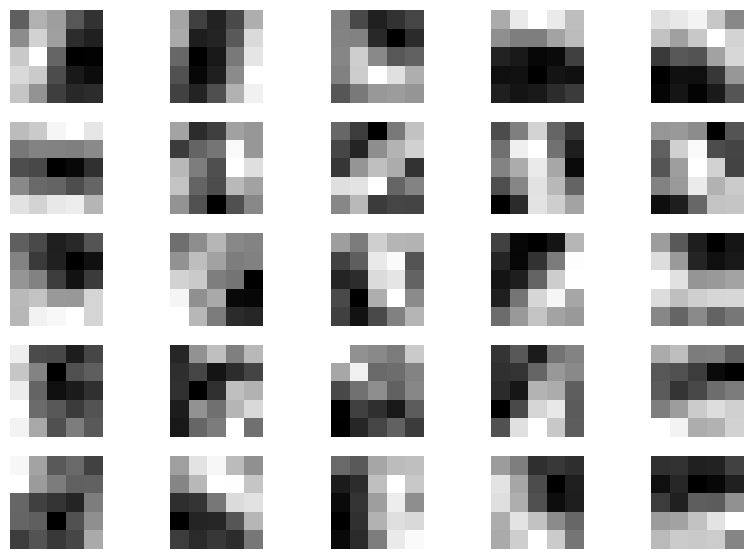

In [12]:
fig = plt.figure(figsize=(10, 7))
(rows, cols) = (5, 5)

for i in range(rows*cols):
  fig.add_subplot(rows, cols, i+1)
  plt.imshow(np.reshape(model.layers[1].weights[0], (5, 5, 50))[:, :, i], cmap="gray")
  plt.axis('off')

Visualize the embedding learned by the network.  (In other words, make a scatter plot of the 2D embedding vectors produced by the network when given the training images as input.)  What shape does the embedding have?  Why?

2024-01-27 10:20:25.280257: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 6912000000 exceeds 10% of free system memory.
2024-01-27 10:20:27.270046: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 6912000000 exceeds 10% of free system memory.
2024-01-27 10:20:30.013647: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 6912000000 exceeds 10% of free system memory.
2024-01-27 10:20:31.589032: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 1728000000 exceeds 10% of free system memory.


ValueError: x and y must be the same size

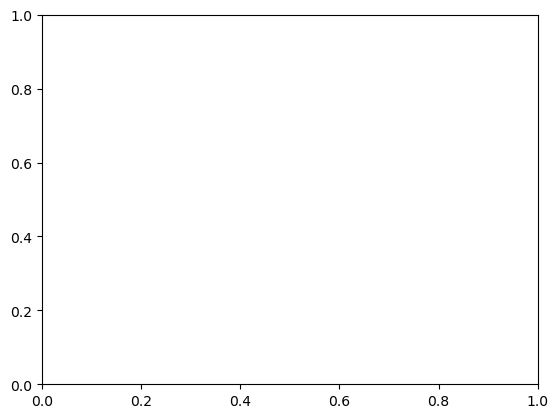

In [13]:
def generate_embeddings(x):
  x_ = x
  for i in range(len(model.layers) - 1):
    x_ = model.layers[i](x_)
  
  return x_


plt.scatter(X_train[0], generate_embeddings(X_train))

Take an example of each digit and rotate it in 15 degree increments (scipy.ndimage.rotate).  Run the classifier on each rotated image and see what happens to their class probabilities.  We would assume that an upside down 6 will be classified as a 9.  But what happens in between?  What does an upside down 2 get classified as?

In [ ]:
import scipy
from scipy import ndimage


# 15 * 24 = 360
# shape: (10, 24, 15, 28, 28)
# each index points to an index of the training set that is said index as the label
indices = [list(y_train).index(i) for i in range(10)]

fig = plt.figure(figsize=(10, 7))
(rows, cols) = (10, 24)

# start @ -1 to cover base case
n = -1
for i in range(rows*cols):
  j = i % 24

  # every 24 rotations, new n
  if j == 0:
    n = n + 1
  
  digit_index = indices[j]

  rotated_image = ndimage.rotate(y_train[digit_index], j * 15)
  fig.add_subplot(rows, cols, i+1)
  plt.imshow(np.reshape(model.layers[1].weights[0], (5, 5, 50))[:, :, i], cmap="gray")
  plt.axis('off')
  plt.title(model.predict(rotated_image))

  # Every 24 rotations, 
  if (i + 1) % 24 == 0:
    n = n + 1

How could you make a neural network that is invariant to rotation?  You don't need to implement this, just give one or two ideas for how you could do it.

**Data Augmentation - train the network with rotated versions of the image so that it learns to classify images in a way that is invariant to rotation.**

In [19]:
!ls

MNIST.ipynb  lenet.h5  lenet.keras
